# 位置编码代码

In [18]:
import torch
from matplotlib import pyplot as plt

设置编码向量维度为512，编码最大长度1024

In [3]:
dim = 512
pos_max = 1024

设置位置pos

In [8]:
pos = torch.arange(pos_max).unsqueeze(1)
print(pos.shape)

torch.Size([1024, 1])


通过位置编码公式计算位置编码

In [10]:
pos_embedding = torch.zeros(pos_max, dim)
base = 10000

In [12]:
pos_embedding[:, 0::2] = torch.sin(pos / (base ** (torch.arange(0, dim, 2) / dim)))
pos_embedding[:, 1::2] = torch.cos(pos / (base ** (torch.arange(0, dim, 2) / dim)))

In [13]:
print(pos_embedding.shape)

torch.Size([1024, 512])


In [14]:
print(pos_embedding[0, :10])
print(pos_embedding[1, :10])

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])
tensor([0.8415, 0.5403, 0.8219, 0.5697, 0.8020, 0.5974, 0.7819, 0.6234, 0.7617,
        0.6479])


查看位置编码的变化，以及位置编码的相似度，可以看到位置编码的相似度随着位置的增加而减小

In [21]:
result = pos_embedding[0, :] @ pos_embedding.transpose(1, 0)
result = result.tolist()
print(result[:10])

[256.0, 249.10211181640625, 231.733642578125, 211.74945068359375, 196.688232421875, 189.5966796875, 188.24818420410156, 187.86500549316406, 184.9651336669922, 179.45652770996094]


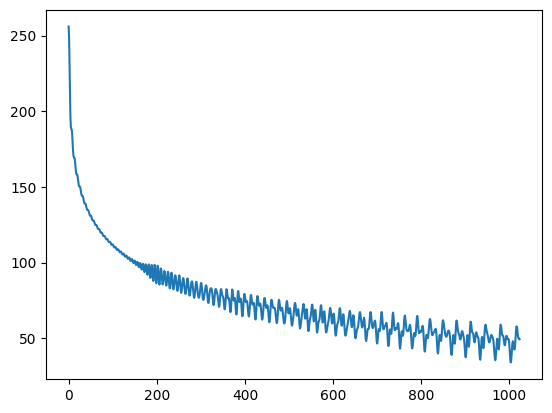

In [22]:
x = range(pos_max)
plt.plot(x, result)
plt.show()